#### Importando as bibliotecas e frameworks

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### Criando o dataframe inicial

In [3]:
#carregando o dataframe total
df_inicial = pd.read_csv("healthcare-dataset-stroke-data.csv")
#criando o filtro dos individuos com stroke
filtro = df_inicial['stroke'] == 1
#criando os dfs de atingidos e não atingidos por avcs (sem levar em consideração as linhas com Nan's)
df_avc = df_inicial[filtro].dropna()
df_not_avc = df_inicial[~filtro].dropna()
#encontrando a quantidade de individuos com avc
tamanho_maximo = len(df_avc)
#criando o dataframe inicial com proporções iguais de acometidos e não acometidos pelo avc 
df_not_avc = df_not_avc[:tamanho_maximo]
df = pd.concat([df_avc,df_not_avc])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


#### Separando a coluna de "stroke"

In [5]:
df_strokes = df.pop("stroke")
df_strokes.head()
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


#### Formatamos o df para ser utilizado na função de treino do sklearn

In [6]:
#get_dummies quando aplicado em uma coluna de dados binários retorna duas colunas no resultado com os nomes das colunas baseados nos valores únicos presentes na coluna original.
df = pd.get_dummies(df).astype(float)
df_strokes =  df_strokes.replace(0, -1)
df = df.drop("id", axis = 1)
#achando o maior valor que será utilizado para deixar as colunas no range de 0 a 1
max_age = df['age'].max()
df['age'] = df['age']/max_age
max_glucose = df['avg_glucose_level'].max()
df['avg_glucose_level'] = df['avg_glucose_level']/max_glucose
max_bmi = df['bmi'].max()
df['bmi'] = df['bmi']/max_bmi
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.817073,0.0,1.0,0.841577,0.564815,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.975610,0.0,1.0,0.389784,0.501543,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597561,0.0,0.0,0.630124,0.530864,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.963415,1.0,0.0,0.640760,0.370370,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.987805,0.0,0.0,0.685251,0.447531,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, df_strokes, train_size=0.5)


Acurácia: 0.645933014354067
[0.45716693 0.01085022 0.03991599 0.20167095 0.17751651 0.
 0.         0.01885024 0.01123715 0.         0.         0.01554766
 0.01288785 0.         0.         0.         0.02619898 0.01026114
 0.01789637 0.        ]


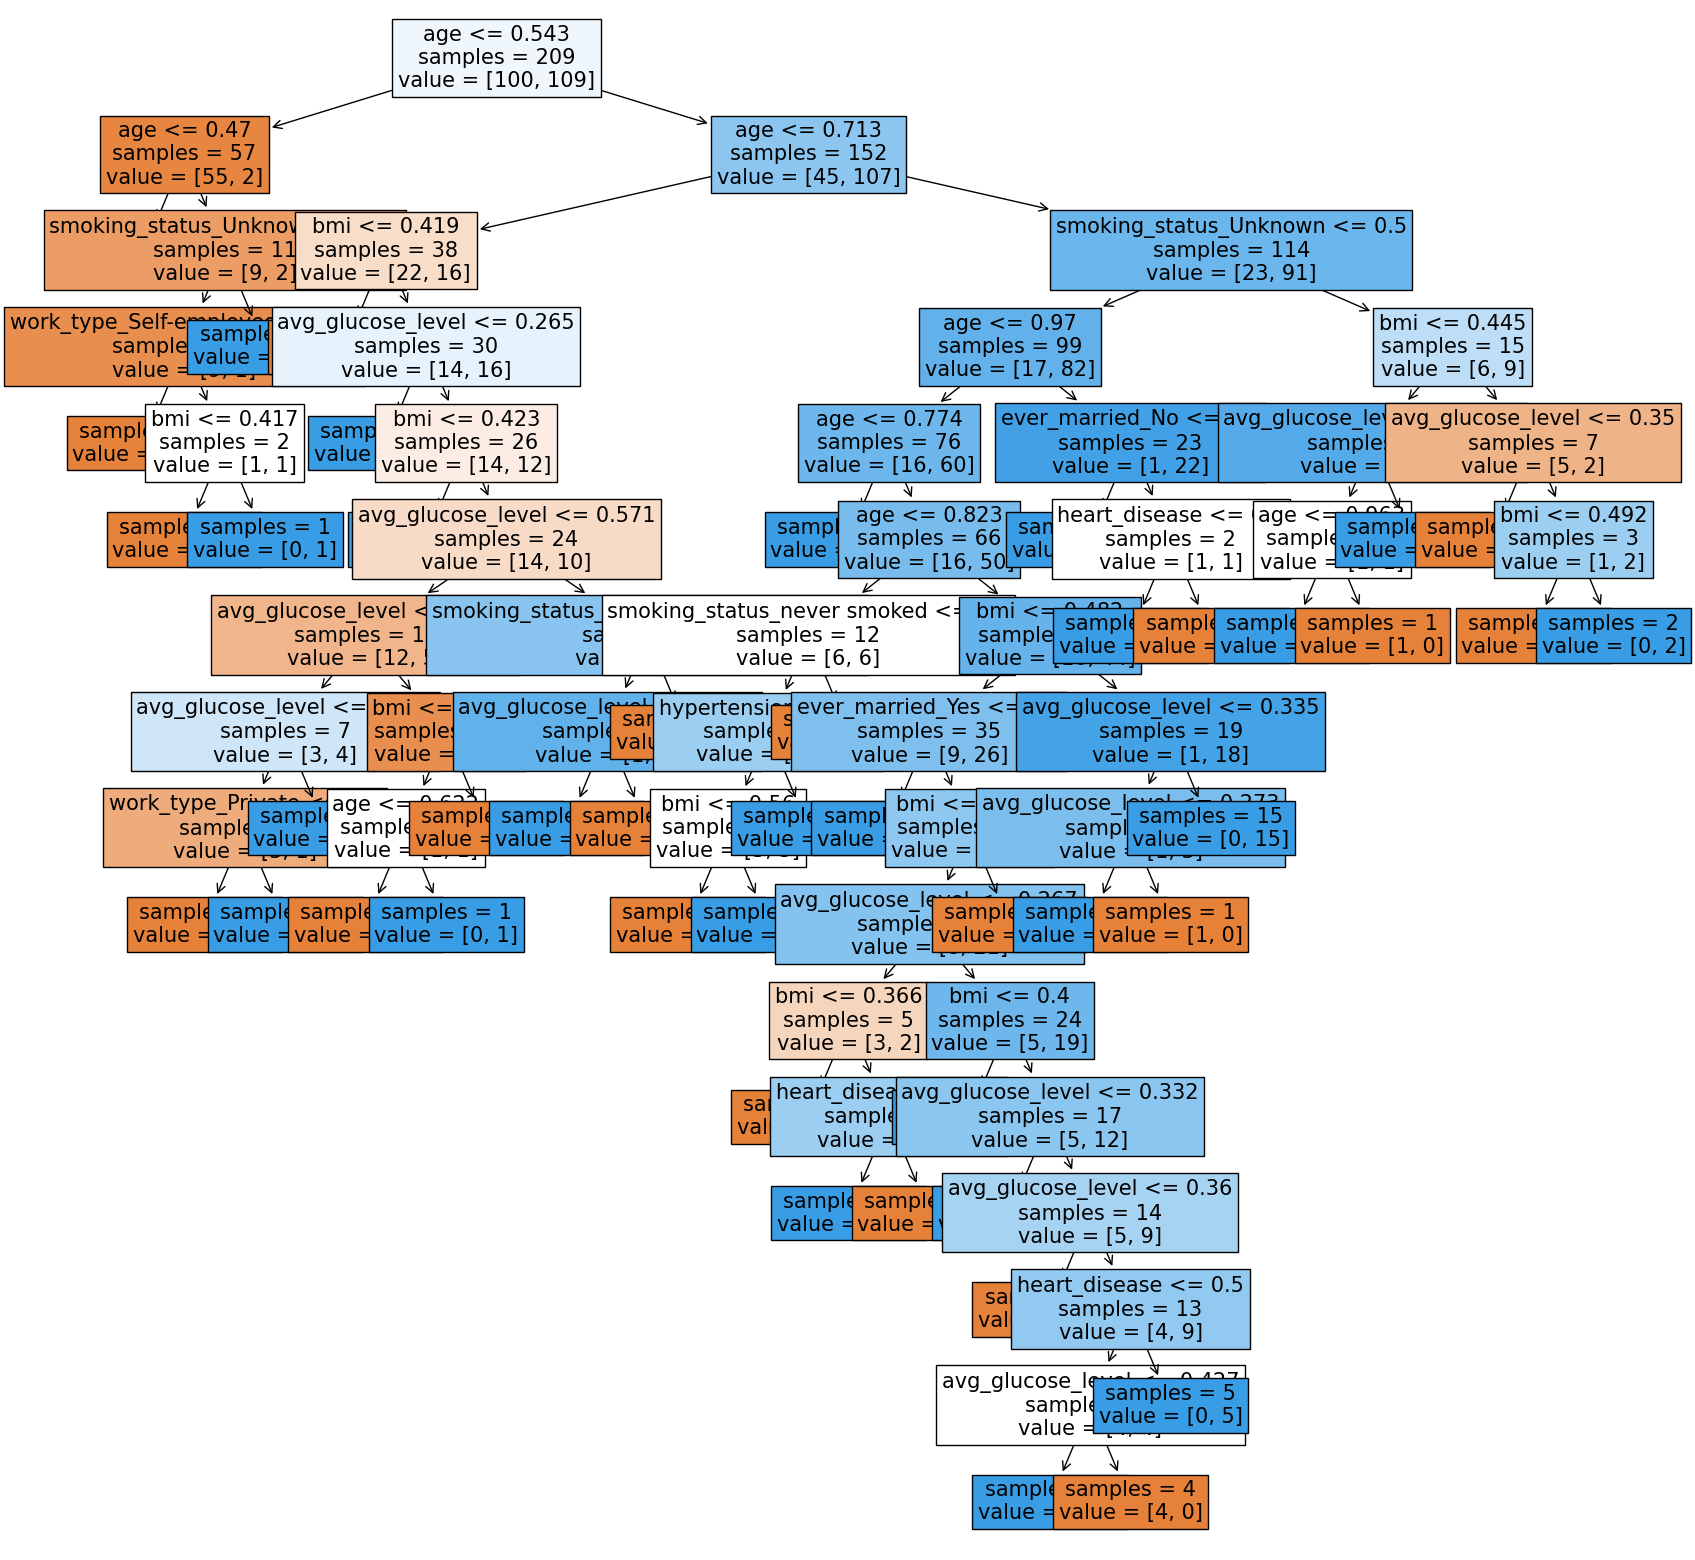

In [16]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

# Faça previsões nos dados de teste usando a árvore treinada
y_pred = tree.predict(X_test)

# Calcule a acurácia das previsões
acc = accuracy_score(y_test, y_pred)
print("Acurácia:", acc)
print(tree.feature_importances_)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=df.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)

In [18]:
X_train.shape
y_train.shape

(209,)

In [19]:
X_train = X_train.to_numpy().T
y_train = y_train.to_numpy()


X_train  = X_train.astype(float)
y_train  = y_train.astype(float)


X_test = X_test.to_numpy().T
y_test = y_test.to_numpy()


X_test  = X_test.astype(float)
y_test  = y_test.astype(float)

print(y_test.shape)

(209,)


In [20]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))


import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss( parametros ):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

pontos = X_train
alvos = y_train

w = np.random.randn( 20, 1)
b = np.random.randn()
alpha = 10**-4

for n in range(200000):

    grad_ = g( (w, b, pontos, alvos) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

print(w)
print(b)
print(len(grad_))

[[ 1.50692051]
 [ 0.17468067]
 [ 0.36330402]
 [ 0.06954583]
 [ 0.77267588]
 [-1.11030384]
 [-1.13454756]
 [ 0.08652337]
 [ 0.13375937]
 [ 0.04848383]
 [ 0.82677581]
 [ 0.23334913]
 [ 0.35850716]
 [ 0.28171255]
 [-0.34305017]
 [-0.16973959]
 [-0.45744775]
 [-0.20347485]
 [-0.51964402]
 [-0.21691157]]
-0.06507932147636836
4


In [14]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

In [17]:
y_est = w.T @ X_test + b
print(f"{accuracy(y_test, y_est)*100} %")

72.24880382775119 %


#### Hipótese nula

In [4]:
#Levando em consideração o df que será utilizado nos experimentos que é composto por metade de pessoas que tiveram avc e metade de pessoas que não tiveram, 
#podemos escolher qualquer um dos casos para servir como a hipotese nula (utilizei os doentes como base).

quantidade_de_atingidos_por_avc_teorico = len(df)
filtro_atingidos = df['stroke'] == 1
df_atingidos_avc = df[filtro_atingidos]
quantidade_de_atingidos_por_avc_real = len(df_atingidos_avc)
acertividade = f"{(quantidade_de_atingidos_por_avc_real/quantidade_de_atingidos_por_avc_teorico)*100} %"
print(acertividade)


50.0 %


#### Relação entre os resultados obtidos e artigos científicos.

A partir dos experimentos realizados acima, podemos concluir que alguns fatores possuem maior participação na presença de AVCs, os dois principais encontrados são a idade e as relações de trabalho e com base nos artigos "Age-Related Differences in Characteristics, Performance Measures, Treatment Trends, and Outcomes in Patients With Ischemic Stroke" e "Long Working Hours and Risk of Cardiovascular Disease", podemos demomstrar esses resultados encontrados. O primeiro artigo comprova a relação entre a idade e o risco de AVC, evidenciando que a idade é um fator de risco significativo, segundo o artigo para cada 10 anos sucessivos após os 55 anos de idade, a taxa de AVC mais que dobra tanto em homens quanto em mulheres. Estudos populacionais indicam que 65% de todos os AVCs ocorrem em indivíduos com mais de 65 anos de idade. Já o segundo artigo demonstra por meio de estudos epidemiológicos e experimentais que as condições de trabalho podem contribuir para o desenvolvimento de problemas cardiovasculares, incluindo o AVC.

Link dos artigos utilizados: 

1. Age-Related Differences in Characteristics, Performance Measures, Treatment Trends, and Outcomes in Patients With Ischemic Stroke (https://www.ahajournals.org/doi/10.1161/circulationaha.109.892497#:~:text=Age%20is%20the%20most%20important,stroke%20types%2C%20including%20ischemic%20stroke.&text=For%20each%20successive%2010%20years,in%20both%20men%20and%20women.&text=Population-based%20studies%20indicated%20that,individuals%20>65%20years%20of%20age).

2. Long Working Hours and Risk of Cardiovascular Disease (https://link.springer.com/article/10.1007/s11886-018-1049-9)